In [1]:
import pandas as pd
import numpy as np

In [37]:
#fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\01Nov2019_GenderizedData.csv'
fileLocation = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb\\stage3FinalProcessedDF_Nov-04-2019.csv'

data = pd.read_csv(fileLocation)

In [38]:
data.director_ids.nunique()

133100

In [39]:
# Extracting the year from release date column and movie column since the date published was not accurate

data['release_year'] = data.release_date.str.extract('(\d{4})', expand=False).str.strip()
data['movie_year'] = data.title.str.extract("\([^\d]*(\d{4})[^\d]*\)", expand=False).str.strip()

In [40]:
# Fill missing values in release year with that of movie year
data.loc[data['release_year'].isna(),'release_year'] = data['movie_year']
data.loc[data['release_year'].isna(),'release_year'] = data['year']

In [42]:
data.release_year.value_counts(dropna = False)

C:\Users\yuvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [43]:
data.release_year = data.release_year.astype(int)

In [44]:
# Sort by release year to find the first release year of each director
sorted_df = data.sort_values(by='release_year')
sorted_df2 = sorted_df.drop_duplicates(subset= 'director_ids',keep='first')

In [45]:
sorted_df2

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,release_year,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year
220948,2006-01-01,nm1729707,tt0444211,"Johannes Passion, BWV. 245 (1725 Version) (Vid...",1,None,None,8.3,6,None,1725,Arjen Terpstra,\N,\N,"producer,director","tt1270262,tt1484981,tt0444211,tt0381190",2006,1,Male,1725
496773,2015-12-16,nm1284117,tt2075247,Man Walking Around the Corner (1887) - IMDb,5,1,None,5.2,622,None,1887,Louis Aimé Augustin Le Prince,1842,1890,"director,cinematographer,editor","tt0392728,tt0343112,tt1758563,tt2075247",2015,12,Male,1887
557687,2013-11-12,nm6027351,tt3274100,Pferd und Reiter Springen über ein Hindernis (...,1,None,None,6.0,84,None,1888,Ottomar Anschütz,1846,1907,"director,cinematographer",tt3274100,2013,11,Male,1888
397743,2015-08-14,nm2954641,tt1202028,A londoni Trafalgar tér (1890) - IMDb,2,2,None,5.6,457,None,1890,Wordsworth Donisthorpe,1847,1914,"director,cinematographer",tt1202028,2015,8,Male,1890
193389,2014-02-21,nm0005690,tt0361921,Csínytevések 1. (1890) - IMDb,10,None,None,5.2,886,1890 (USA) See more »,1890,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2014,2,Male,1890
193388,2014-02-21,nm0374658,tt0361921,Csínytevések 1. (1890) - IMDb,10,None,None,5.2,886,1890 (USA) See more »,1890,William Heise,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",2014,2,Male,1890
397742,2015-08-14,nm2955286,tt1202028,A londoni Trafalgar tér (1890) - IMDb,2,2,None,5.6,457,None,1890,William Carr Crofts,1846,1894,"director,cinematographer",tt1202028,2015,8,Male,1890
554446,2013-11-22,nm2930046,tt3201916,Je vous aime (1891) - IMDb,1,None,None,4.9,102,1891 (France) See more »,1891,Georges Demenÿ,1850,1917,director,"tt3201916,tt1189066,tt1189078",2013,11,Male,1891
566872,2015-08-22,nm4620889,tt3508566,La vague (1891) - IMDb,2,None,None,4.8,184,None,1891,Étienne-Jules Marey,1830,1904,"director,producer,cinematographer","tt2049440,tt5447082,tt5285442,tt8588366",2015,8,Male,1891
1,1892-10-28,nm0721526,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,28 October 1892 (France) See more »,1892,Émile Reynaud,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",1892,10,Male,1892


In [72]:
sorted_df3 = sorted_df2[['release_year','director_ids']]

In [73]:
# Get first movie release year of each director
First_year = sorted_df3.rename(columns={'release_year':'FirstMovieYear'})

In [74]:
merged_with_firstYear = data.merge(First_year, on='director_ids')


In [75]:
merged_with_firstYear["Career_Year_Number"] = merged_with_firstYear.release_year - merged_with_firstYear.FirstMovieYear + 1

In [76]:
merged_with_firstYear

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,birthYear,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,Career_Year_Number
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5
5,2009-01-04,nm0005690,tt0000036,Awakening of Rip (1896) - IMDb,2,None,None,4.5,372,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
6,1896-09-12,nm0005690,tt0000060,Dancing Darkies (1896) - IMDb,0,None,None,8.2,56,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
7,2009-01-04,nm0005690,tt0000076,Exit of Rip and the Dwarf (1896) - IMDb,2,None,None,4.5,342,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
8,1896-09-12,nm0005690,tt0000082,A Hard Wash (1896) - IMDb,3,None,None,5.9,17,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
9,2009-01-04,nm0005690,tt0000108,Rip Leaving Sleepy Hollow (1896) - IMDb,2,None,None,4.4,338,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7


In [77]:
merged_with_firstYear.Career_Year_Number.value_counts()

1      148826
3       24919
2       24420
4       24195
5       23793
6       22519
7       22097
8       21631
9       20839
10      19847
11      19049
12      17985
13      17266
14      16043
15      15156
16      13781
17      13627
18      12411
19      12293
20      11506
21      10909
22       9870
23       9804
24       8923
25       8245
26       7477
27       7453
28       6822
29       6120
30       6067
        ...  
70          8
68          8
83          6
77          6
73          6
88          5
84          4
85          4
86          3
87          3
76          3
89          2
96          2
100         2
104         1
115         1
112         1
111         1
110         1
107         1
117         1
102         1
101         1
97          1
95          1
93          1
92          1
91          1
90          1
122         1
Name: Career_Year_Number, Length: 109, dtype: int64

In [52]:
# Search for a value in a column

merged_with_firstYear.loc[merged_with_firstYear.Career_Year_Number > 80]

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,birthYear,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,Career_Year_Number
28,2011-09-20,nm0005690,tt0229217,Annabelle Butterfly Dance (1894) - IMDb,8,1,None,5.9,573,20 September 2011 (Greece) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2011,9,Male,1894,1890,122
147,2005-04-15,nm0525910,tt0222170,"Lyon, place Bellecour (1895) - IMDb",1,None,None,5.4,191,15 April 2005 (France) See more »,...,1864,1948,"producer,director,cinematographer","tt6231346,tt1167665,tt0000014,tt0000012",2005,4,Male,1895,1892,114
159,2001-10-26,nm0525910,tt0367590,Le chalet du cycle (1900) - IMDb,None,None,None,5.3,11,26 October 2001 (Sweden) See more »,...,1864,1948,"producer,director,cinematographer","tt6231346,tt1167665,tt0000014,tt0000012",2001,10,Male,1900,1892,110
256,2006-09-02,nm0617588,tt0135696,"Négy fej jobb, mint egy (1898) - IMDb",15,4,None,7.6,2167,28 November 2009 (Portugal) See more »,...,1861,1938,"director,actor,producer","tt0000499,tt0000091,tt0223267,tt0002113",2006,9,Male,1898,1896,114
265,2008-02-03,nm0617588,tt0215737,Napfogyatkozás (1907) - IMDb,11,3,None,6.5,845,22 September 2009 (Greece) See more »,...,1861,1938,"director,actor,producer","tt0000499,tt0000091,tt0223267,tt0002113",2008,2,Male,1907,1896,114
381,2008-03-28,nm0617588,tt0225972,L'illusioniste double et la tête vivante (1900...,4,1,None,6.4,291,28 November 2009 (Portugal) See more »,...,1861,1938,"director,actor,producer","tt0000499,tt0000091,tt0223267,tt0002113",2008,3,Male,1900,1896,114
402,2008-03-13,nm0617588,tt0227668,Le tonneau des danaïdes (1900) - IMDb,2,1,None,5.1,160,28 November 2009 (Portugal) See more »,...,1861,1938,"director,actor,producer","tt0000499,tt0000091,tt0223267,tt0002113",2008,3,Male,1900,1896,114
405,2008-04-03,nm0617588,tt0227866,L'équilibre impossible (1902) - IMDb,2,1,None,6.2,155,28 November 2009 (Portugal) See more »,...,1861,1938,"director,actor,producer","tt0000499,tt0000091,tt0223267,tt0002113",2008,4,Male,1902,1896,114
408,2010-07-17,nm0617588,tt0228219,Le dirigeable fantastique (1906) - IMDb,3,1,None,5.7,129,17 July 2010 (USA) See more »,...,1861,1938,"director,actor,producer","tt0000499,tt0000091,tt0223267,tt0002113",2010,7,Male,1906,1896,115
448,2009-09-01,nm0349785,tt0000140,Baignade dans le torrent (1897) - IMDb,2,None,None,5.4,156,1 September 2009 (USA) See more »,...,1873,1968,"director,producer,writer","tt0003365,tt0004833,tt0233824,tt0005790",2009,9,Female,1897,1896,114


In [78]:
finalDF = merged_with_firstYear.loc[merged_with_firstYear['Career_Year_Number'] < 80]

In [79]:
finalDF

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,birthYear,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,Career_Year_Number
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5
5,2009-01-04,nm0005690,tt0000036,Awakening of Rip (1896) - IMDb,2,None,None,4.5,372,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
6,1896-09-12,nm0005690,tt0000060,Dancing Darkies (1896) - IMDb,0,None,None,8.2,56,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
7,2009-01-04,nm0005690,tt0000076,Exit of Rip and the Dwarf (1896) - IMDb,2,None,None,4.5,342,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7
8,1896-09-12,nm0005690,tt0000082,A Hard Wash (1896) - IMDb,3,None,None,5.9,17,12 September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7
9,2009-01-04,nm0005690,tt0000108,Rip Leaving Sleepy Hollow (1896) - IMDb,2,None,None,4.4,338,September 1896 (USA) See more »,...,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7


In [81]:
# Act as a counter for pivot table calculations
finalDF['Dummy'] = 1

C:\Users\yuvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
finalDF.head()

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,Career_Year_Number,Dummy
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5,1
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4,1
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5,1
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5,1
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5,1


In [ ]:
# # Generate a pivot table for count of Female and male year wise
# pivotTable = pd.pivot_table(finalDF, values='Dummy', index=['director_ids','Gender'],columns=['Career_Year_Number'], aggfunc=np.sum, fill_value=0)

In [ ]:
# pivotTable.head()

In [ ]:
# # pivotTable = pivotTable.merge(data[['Gender']], on=['director_ids'])


# # pivotTable = pivotTable.merge(data, on='director_ids')

# type(pivotTable)

In [ ]:
# pivotTable.index.values

In [ ]:
# pivotTable.loc[['nm0000005']]

In [94]:
malePivotData = finalDF.loc[finalDF['Gender'] == 'Male']

In [95]:
malePivotData

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,Career_Year_Number,Dummy
0,1894-03-10,nm0005690,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,10 March 1894 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,3,Male,1894,1890,5,1
1,1893-05-09,nm0005690,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,9 May 1893 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1893,5,Male,1893,1890,4,1
2,1894-10-17,nm0005690,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,17 October 1894 (UK) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,10,Male,1894,1890,5,1
3,2008-12-31,nm0005690,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,None,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2008,12,Male,1894,1890,5,1
4,1894-01-09,nm0005690,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,9 January 1894 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1894,1,Male,1894,1890,5,1
5,2009-01-04,nm0005690,tt0000036,Awakening of Rip (1896) - IMDb,2,None,None,4.5,372,September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7,1
6,1896-09-12,nm0005690,tt0000060,Dancing Darkies (1896) - IMDb,0,None,None,8.2,56,12 September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7,1
7,2009-01-04,nm0005690,tt0000076,Exit of Rip and the Dwarf (1896) - IMDb,2,None,None,4.5,342,September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7,1
8,1896-09-12,nm0005690,tt0000082,A Hard Wash (1896) - IMDb,3,None,None,5.9,17,12 September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",1896,9,Male,1896,1890,7,1
9,2009-01-04,nm0005690,tt0000108,Rip Leaving Sleepy Hollow (1896) - IMDb,2,None,None,4.4,338,September 1896 (USA) See more »,...,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",2009,1,Male,1896,1890,7,1


In [96]:
femalePivotData = finalDF.loc[finalDF['Gender'] == 'Female']

In [97]:
femalePivotData

,date_published,director_ids,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,release_date,...,deathYear,primaryProfession,knownForTitles,year,month,Gender,movie_year,FirstMovieYear,Career_Year_Number,Dummy
199,2000-10-31,nm0010291,tt0000020,The Derby 1895 (1895) - IMDb,3,None,None,5.1,189,None,...,1918,"cinematographer,director,producer","tt0000024,tt0282161,tt0000020,tt0000025",2000,10,Female,1895,1895,1,1
200,1896-01-14,nm0010291,tt0000030,A hullámzó tenger Dovernél (1896) - IMDb,7,1,None,5.3,513,14 January 1896 (UK) See more »,...,1918,"cinematographer,director,producer","tt0000024,tt0282161,tt0000020,tt0000025",1896,1,Female,1896,1895,2,1
201,2010-01-01,nm0010291,tt0000048,The Boxing Kangaroo (1896) - IMDb,1,None,None,5.5,75,January 1896 (UK) See more »,...,1918,"cinematographer,director,producer","tt0000024,tt0282161,tt0000020,tt0000025",2010,1,Female,1896,1895,2,1
202,2007-03-18,nm0010291,tt0000049,"Boxing Match; or, Glove Contest (1896) - IMDb",1,None,None,6.1,17,January 1896 (UK) See more »,...,1918,"cinematographer,director,producer","tt0000024,tt0282161,tt0000020,tt0000025",2007,3,Female,1896,1895,2,1
203,1897-03-17,nm0010291,tt0000154,Henley Regatta (1897) - IMDb,None,None,None,5.4,5,17 March 1897 (UK) See more »,...,1918,"cinematographer,director,producer","tt0000024,tt0282161,tt0000020,tt0000025",1897,3,Female,1897,1895,3,1
204,2007-03-02,nm0010291,tt0187702,A zsebtolvaj letartóztatása (1895) - IMDb,1,None,None,5.6,99,May 1895 (UK) See more »,...,1918,"cinematographer,director,producer","tt0000024,tt0282161,tt0000020,tt0000025",2007,3,Female,1895,1895,1,1
205,2003-10-20,nm0010291,tt0187864,"Golfing Extraordinary, Five Gentlemen (1896) -...",1,None,None,7.1,7,May 1896 (UK) See more »,...,1918,"cinematographer,director,producer","tt0000024,tt0282161,tt0000020,tt0000025",2003,10,Female,1896,1895,2,1
447,2015-08-20,nm0349785,tt0000136,L'arroseur arrosé (1897) - IMDb,3,None,None,6.2,185,None,...,1968,"director,producer,writer","tt0003365,tt0004833,tt0233824,tt0005790",2015,8,Female,1897,1896,2,1
449,2009-11-08,nm0349785,tt0000143,Les cambrioleurs (1897) - IMDb,2,None,None,5.1,134,1898 (France) See more »,...,1968,"director,producer,writer","tt0003365,tt0004833,tt0233824,tt0005790",2009,11,Female,1897,1896,3,1
451,2014-07-08,nm0349785,tt0000150,Danse fleur de lotus (1897) - IMDb,1,None,None,5.8,62,None,...,1968,"director,producer,writer","tt0003365,tt0004833,tt0233824,tt0005790",2014,7,Female,1897,1896,2,1


In [98]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

malepivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],columns=['Career_Year_Number'], aggfunc=np.sum, fill_value=0)

In [99]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],columns=['Career_Year_Number'], aggfunc=np.sum, fill_value=0)

In [100]:
malepivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2,1,2,2,2,1,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
nm0000008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000010,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000018,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000019,2,3,0,1,1,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
nm0000024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000032,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000033,4,3,3,1,3,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
femalePivotTable

Career_Year_Number,1,2,3,4,5,6,7,8,9,10,...,63,64,65,67,68,71,72,75,78,79
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000096,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000097,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000098,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000099,1,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000113,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000125,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000149,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
nm0000159,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nm0000161,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Female2 = Female_pivot.drop(['director_ids','Gender'], axis=1)
# Male2 = Male_pivot.drop(['director_ids','Gender'], axis=1)

In [106]:
femalePivotTable.to_csv("Female.csv")
malepivotTable.to_csv('Male.csv')

In [109]:
female_avg_movie_per_year =  femalePivotTable.sum(axis=0) / femalePivotTable.shape[0]
male_avg_movie_per_year = malepivotTable.sum(axis=0) / malepivotTable.shape[0]


In [110]:
male_avg_movie_per_year

Career_Year_Number
1     1.124488
2     0.197404
3     0.199453
4     0.194151
5     0.192246
6     0.183132
7     0.179985
8     0.179283
9     0.170218
10    0.161403
11    0.156745
12    0.148912
13    0.142425
14    0.132494
15    0.127163
16    0.115490
17    0.115817
18    0.105097
19    0.103162
20    0.095627
21    0.090892
22    0.082020
23    0.081885
24    0.075235
25    0.068749
26    0.062898
27    0.062215
28    0.057644
29    0.051812
30    0.051196
        ...   
50    0.005408
51    0.005947
52    0.004638
53    0.005456
54    0.004629
55    0.004715
56    0.003330
57    0.002627
58    0.002108
59    0.002290
60    0.001357
61    0.001694
62    0.001203
63    0.001597
64    0.001010
65    0.000433
66    0.000154
67    0.000135
68    0.000067
69    0.000096
70    0.000077
71    0.000087
72    0.000077
73    0.000058
74    0.000202
75    0.000135
76    0.000029
77    0.000058
78    0.000087
79    0.000058
Length: 79, dtype: float64

In [111]:
female_avg_movie_per_year

Career_Year_Number
1     1.095594
2     0.133866
3     0.143665
4     0.137737
5     0.130748
6     0.119544
7     0.116289
8     0.102823
9     0.107963
10    0.105359
11    0.094600
12    0.086034
13    0.084493
14    0.077948
15    0.066539
16    0.060988
17    0.054547
18    0.051052
19    0.053896
20    0.053759
21    0.050161
22    0.046152
23    0.044371
24    0.037861
25    0.037724
26    0.032241
27    0.033852
28    0.028507
29    0.025218
30    0.025594
        ...   
43    0.005996
44    0.005242
45    0.006133
46    0.004112
47    0.003769
48    0.003015
49    0.002022
50    0.001473
51    0.001439
52    0.001747
53    0.001096
54    0.001782
55    0.000685
56    0.000582
57    0.000514
58    0.000343
59    0.000308
60    0.000411
61    0.000548
62    0.000548
63    0.000240
64    0.000171
65    0.000034
67    0.000034
68    0.000034
71    0.000034
72    0.000069
75    0.000034
78    0.000069
79    0.000171
Length: 72, dtype: float64

In [114]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


In [129]:
femaleAvgDF = female_avg_movie_per_year.to_frame()
femaleAvgDF = femaleAvgDF.reset_index(inplace= False)
femaleAvgDF.columns = ['Career_Year_Number', 'Average']

In [130]:
maleAvgDF = male_avg_movie_per_year.to_frame()
maleAvgDF = maleAvgDF.reset_index(inplace= False)
maleAvgDF.columns = ['Career_Year_Number', 'Average']

In [132]:
maleAvgDF

,Career_Year_Number,Average
0,1,1.124488
1,2,0.197404
2,3,0.199453
3,4,0.194151
4,5,0.192246
5,6,0.183132
6,7,0.179985
7,8,0.179283
8,9,0.170218
9,10,0.161403


In [134]:
# Testing Draw Plot - Version 1

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()



In [ ]:
male_avg_movie_per_year

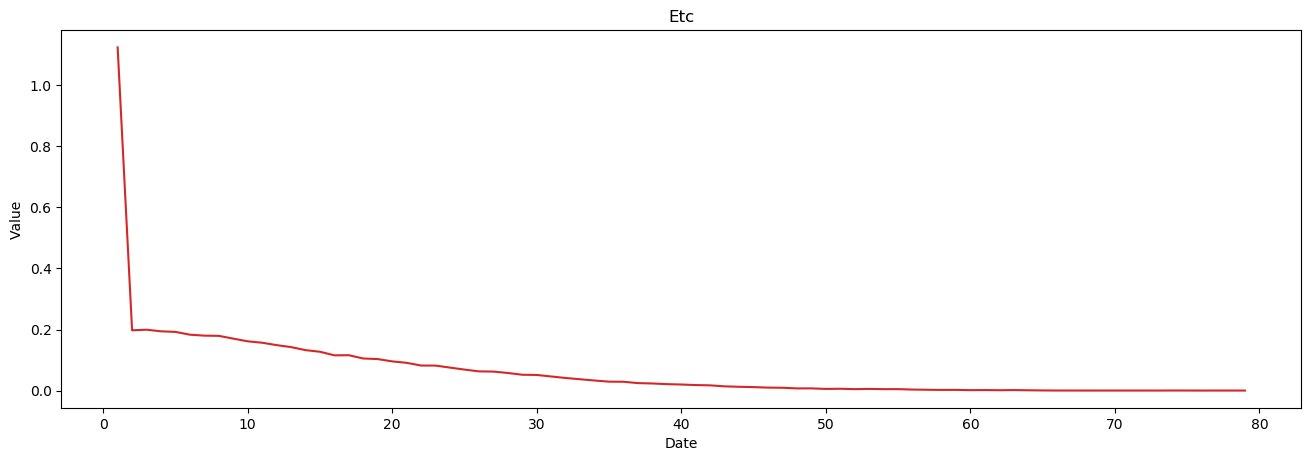

In [135]:
# Number of movies produced over the years by both the gender

careerYearMaleDF = pd.DataFrame({'Career_Year_Number':male_avg_movie_per_year.index,'Average':male_avg_movie_per_year.values})
careerYearMaleDF = careerYearMaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearMaleDF, x=careerYearMaleDF.Career_Year_Number, y=careerYearMaleDF.Average, title='Male Directors')

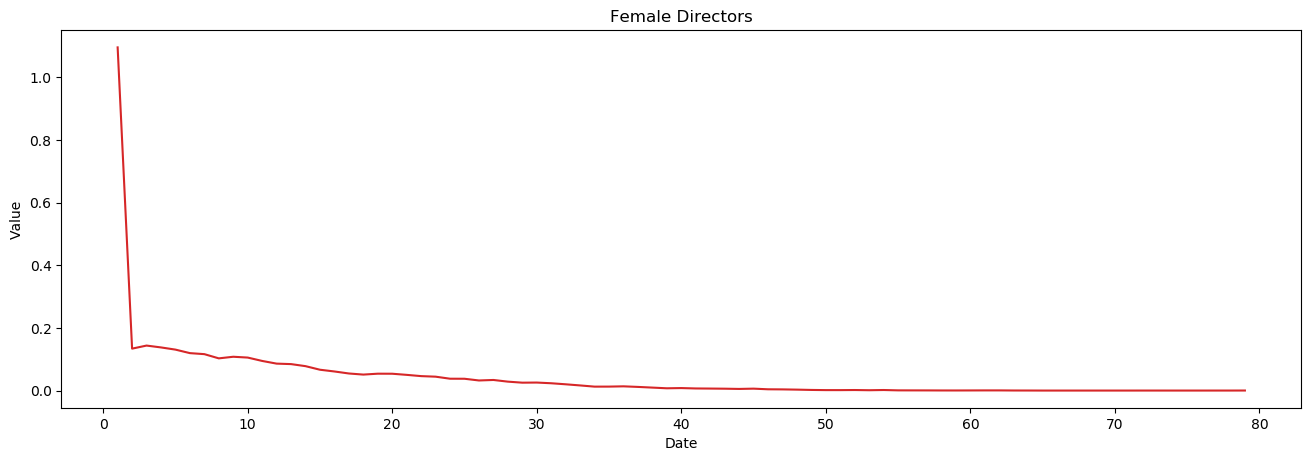

In [136]:
# Number of movies produced over the years by both the gender

careerYearFemaleDF = pd.DataFrame({'Career_Year_Number':female_avg_movie_per_year.index,'Average':female_avg_movie_per_year.values})
careerYearFemaleDF = careerYearFemaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearFemaleDF, x=careerYearFemaleDF.Career_Year_Number, y=careerYearFemaleDF.Average, title='Female Directors')

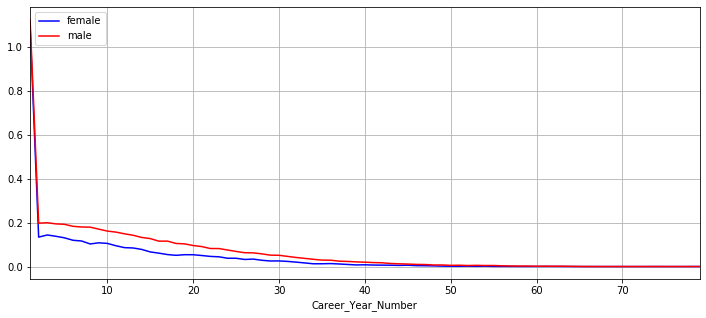

In [140]:
plt.figure(figsize=(12,5))
plt.xlabel('Etc')

ax1 = female_avg_movie_per_year.plot(color='blue', grid=True, label='female')
ax2 = male_avg_movie_per_year.plot(color='red', grid=True, label='male')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1, l1, loc=2)
plt.show()